In [1]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
from utils import *
from filters import *

In [2]:
delta1 = 0.15
delta2 = 0.15
fp1,fp2,fs1,fs2,f_samp = 118000,193000,113000,198000,600000

def normalize(f_samp,L_freq):
    return (np.array(L_freq)/f_samp)*2*np.pi

[wp1,wp2,ws1,ws2] = normalize(f_samp,[fp1,fp2,fs1,fs2])

def to_analog(L_w):
    return np.tan(np.array(L_w)/2)

[Op1,Op2,Os1,Os2] = to_analog([wp1,wp2,ws1,ws2])

def Bp_to_lp(Op1,Op2,Os1,Os2):
    B = Op2-Op1
    Oo = np.sqrt(Op2*Op1)

    def transfer_fn(s):
        return (s**2+Oo**2)/(B*s)
    def freq_transform(Omega):
        return (transfer_fn(Omega*1j)/(1j)).real
    
    return np.vectorize(freq_transform)([Op1,Op2,Os1,Os2]),B,Oo,transfer_fn

[OLp1,OLp2,OLs1,OLs2],B,Omega_o,tr_fn = Bp_to_lp(Op1,Op2,Os1,Os2)

In [3]:
omega_p,omega_s = max(-OLp1,OLp2),min(-OLs1,OLs2)
butter_lp,N,omega_c,poles = Butterworth(delta1,delta2,omega_p,omega_s)

In [4]:
ang_freq = np.linspace(0,1.5*omega_s,1401)
response = np.vectorize(butter_lp)(ang_freq*(1j))

mag_resp = np.absolute(response)
phase = np.angle(response)

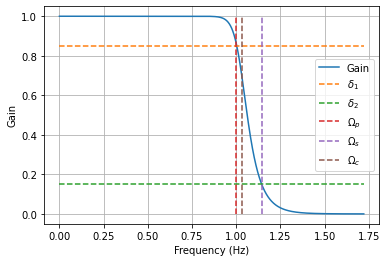

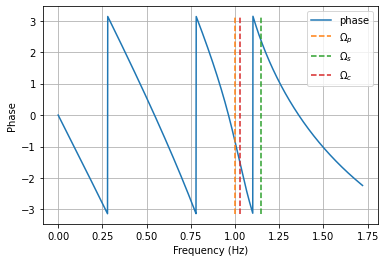

In [5]:
plt.plot(ang_freq,mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([omega_p,omega_p], [0,1],'--', label='$\Omega_p$')
plt.plot([omega_s,omega_s], [0,1],'--', label='$\Omega_s$')
plt.plot([omega_c,omega_c], [0,1],'--', label='$\Omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_sL.pdf')

plt.show()

plt.plot(ang_freq,phase,label="phase")
plt.plot([omega_p,omega_p], [-pi,pi],'--', label='$\Omega_p$')
plt.plot([omega_s,omega_s], [-pi,pi],'--', label='$\Omega_s$')
plt.plot([omega_c,omega_c], [-pi,pi],'--', label='$\Omega_c$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_sL.pdf')
plt.show()

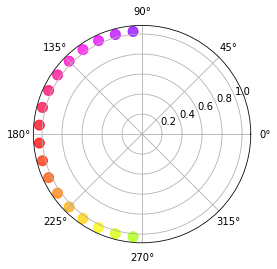

In [6]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles), np.abs(poles), c=np.angle(poles), s=100, cmap='hsv', alpha=0.75)
plt.savefig('Poles_sL.pdf')


In [7]:
N,omega_c

(18, 1.0302364284153338)

In [8]:
sl = symbols('sl') # creating the symbolic sL
Tr_fn_lp = butter_lp(sl) # passing symbol to lp transfer function 
Tr_fn_lp

1.70948084487145/((sl + 0.0897910211242331 - 1.02631606776833*I)*(sl + 0.0897910211242331 + 1.02631606776833*I)*(sl + 0.266644808632288 - 0.99513197339018*I)*(sl + 0.266644808632289 + 0.99513197339018*I)*(sl + 0.435396728558835 + 0.933711297561643*I)*(sl + 0.435396728558835 - 0.933711297561643*I)*(sl + 0.590919339209496 - 0.843920276437411*I)*(sl + 0.590919339209497 + 0.84392027643741*I)*(sl + 0.728487164757892 - 0.728487164757892*I)*(sl + 0.728487164757892 + 0.728487164757892*I)*(sl + 0.84392027643741 - 0.590919339209497*I)*(sl + 0.843920276437411 + 0.590919339209496*I)*(sl + 0.933711297561643 - 0.435396728558835*I)*(sl + 0.933711297561643 + 0.435396728558835*I)*(sl + 0.99513197339018 + 0.266644808632289*I)*(sl + 0.99513197339018 - 0.266644808632288*I)*(sl + 1.02631606776833 - 0.089791021124233*I)*(sl + 1.02631606776833 + 0.0897910211242327*I))

In [9]:
Tr_fn_lp_print = round_expr(Tr_fn_lp,3) # for printing purposes, we round coefficients
print(latex(Tr_fn_lp_print))
print("===================================")
print(latex(round_expr(expand(Tr_fn_lp,sl),3)))

\frac{1.709}{\left(sl + 0.09 - 1.026 i\right) \left(sl + 0.09 + 1.026 i\right) \left(sl + 0.267 - 0.995 i\right) \left(sl + 0.267 + 0.995 i\right) \left(sl + 0.435 - 0.934 i\right) \left(sl + 0.435 + 0.934 i\right) \left(sl + 0.591 - 0.844 i\right) \left(sl + 0.591 + 0.844 i\right) \left(sl + 0.728 - 0.728 i\right) \left(sl + 0.728 + 0.728 i\right) \left(sl + 0.844 - 0.591 i\right) \left(sl + 0.844 + 0.591 i\right) \left(sl + 0.934 - 0.435 i\right) \left(sl + 0.934 + 0.435 i\right) \left(sl + 0.995 - 0.267 i\right) \left(sl + 0.995 + 0.267 i\right) \left(sl + 1.026 - 0.09 i\right) \left(sl + 1.026 + 0.09 i\right)}
\frac{1.709}{sl^{18} + 11.821 sl^{17} + 69.864 sl^{16} + 273.87 sl^{15} + 796.843 sl^{14} + 1825.355 sl^{13} + 3408.709 sl^{12} + 5302.323 sl^{11} + 6961.457 sl^{10} + 7769.731 sl^{9} + 7388.801 sl^{8} + 5973.293 sl^{7} + 4075.786 sl^{6} + 2316.555 sl^{5} + 1073.351 sl^{4} + 391.55 sl^{3} + 106.015 sl^{2} + 19.038 sl + 1.709}


In [10]:
s = symbols('s')
freq_trfn = tr_fn(s) # S-transformation we obtained from bp_to_lp
Tr_fn_bp = Tr_fn_lp.subs(sl,freq_trfn) # substituting the frequency transform here
Tr_fn_bp

1.70948084487145/((0.0897910211242331 - 1.02631606776833*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.0897910211242331 + 1.02631606776833*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.266644808632288 - 0.99513197339018*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.266644808632289 + 0.99513197339018*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.435396728558835 + 0.933711297561643*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.435396728558835 - 0.933711297561643*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.590919339209496 - 0.843920276437411*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.590919339209497 + 0.84392027643741*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.728487164757892 - 0.728487164757892*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.728487164757892 + 0.728487164757892*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.84392027643741 - 0.590919339209497*I + 1.13189575545203*(s**2 + 1.13289390895274)/s)*(0.8439

In [11]:
Tr_fn_bp = simplify(Tr_fn_bp)
Tr_fn_bp

1.70948084487145*s**18/((1.13189575545203*s**2 + s*(0.0897910211242331 - 1.02631606776833*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.0897910211242331 + 1.02631606776833*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.266644808632288 - 0.99513197339018*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.266644808632289 + 0.99513197339018*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.435396728558835 + 0.933711297561643*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.435396728558835 - 0.933711297561643*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.590919339209496 - 0.843920276437411*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.590919339209497 + 0.84392027643741*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.728487164757892 - 0.728487164757892*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.728487164757892 + 0.728487164757892*I) + 1.28231780692106)*(1.13189575545203*s**2 + s*(0.84392027643741 - 0.590919339209497*I) + 1.28231780692106)*(

In [12]:
print(latex(round_expr(expand(Tr_fn_bp,s),3)))

\frac{1.709 s^{18}}{9.301 s^{36} + 97.129 s^{35} + 696.832 s^{34} + 3627.101 s^{33} + 15534.552 s^{32} + 55939.786 s^{31} + 175832.857 s^{30} + 488032.044 s^{29} + 1216149.219 s^{28} + 2739451.275 s^{27} + 5627981.473 s^{26} + 10589105.733 s^{25} + 18343194.114 s^{24} + 29328967.323 s^{23} + 43424279.892 s^{22} + 59620104.805 s^{21} + 76053916.574 s^{20} + 90189127.94 s^{19} + 99523762.231 s^{18} + 102174713.697 s^{17} + 97611293.432 s^{16} + 86688294.857 s^{15} + 71530225.218 s^{14} + 54732209.506 s^{13} + 38780232.881 s^{12} + 25362027.983 s^{11} + 15270968.928 s^{10} + 8421059.9 s^{9} + 4235252.263 s^{8} + 1925440.039 s^{7} + 785906.597 s^{6} + 283257.193 s^{5} + 89114.448 s^{4} + 23572.098 s^{3} + 5130.457 s^{2} + 810.154 s + 87.886}


In [13]:

butter_bp = lambdify(s, Tr_fn_bp,'numpy') # returns a numpy-ready function

ang_freq = np.linspace(0,2,1401)

bp_response = butter_bp(ang_freq*(1j))
bp_mag_resp = np.absolute(bp_response)
bp_phase = np.angle(bp_response)

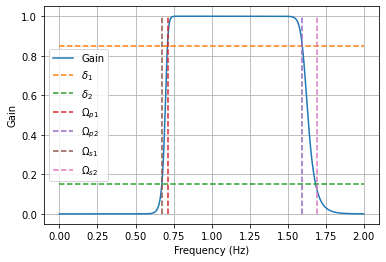

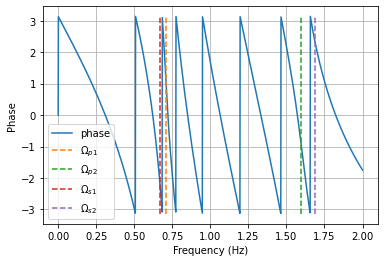

In [14]:
plt.plot(ang_freq,bp_mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([Op1,Op1], [0,1],'--', label='$\Omega_{p1}$')
plt.plot([Op2,Op2], [0,1],'--', label='$\Omega_{p2}$')
plt.plot([Os1,Os1], [0,1],'--', label='$\Omega_{s1}$')
plt.plot([Os2,Os2], [0,1],'--', label='$\Omega_{s2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_s.pdf')

plt.show()

plt.plot(ang_freq,bp_phase,label="phase")
plt.plot([Op1,Op1], [-pi,pi],'--', label='$\Omega_{p1}$')
plt.plot([Op2,Op2], [-pi,pi],'--', label='$\Omega_{p2}$')
plt.plot([Os1,Os1], [-pi,pi],'--', label='$\Omega_{s1}$')
plt.plot([Os2,Os2], [-pi,pi],'--', label='$\Omega_{s2}$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_s.pdf')
plt.show()

In [15]:
poles_bp = solve(1/Tr_fn_bp) # Finding Poles of System in Bandpass domain
poles_bp = np.fromiter(poles_bp,dtype=complex)

In [16]:
poles_bp

array([-0.49253275-1.09571052j, -0.49253275+1.09571052j,
       -0.49154458-1.19533695j, -0.49154458+1.19533695j,
       -0.47201541+1.00365487j, -0.47201541-1.00365487j,
       -0.46682405-1.295874j  , -0.46682405+1.295874j  ,
       -0.43470773+0.92432687j, -0.43470773-0.92432687j,
       -0.41869078-1.39057543j, -0.41869078+1.39057543j,
       -0.38664006-0.86013687j, -0.38664006+0.86013687j,
       -0.34943787-1.47349291j, -0.34943787+1.47349291j,
       -0.33336468-0.81067544j, -0.33336468+0.81067544j,
       -0.27875722+0.77381237j, -0.27875722-0.77381237j,
       -0.26269577-1.53982895j, -0.26269577+1.53982895j,
       -0.22490839-0.74697626j, -0.22490839+0.74697626j,
       -0.17262376+0.72791163j, -0.17262376-0.72791163j,
       -0.16295102-1.58601398j, -0.16295102+1.58601398j,
       -0.12196574-0.71491968j, -0.12196574+0.71491968j,
       -0.07262262+0.70684117j, -0.07262262-0.70684117j,
       -0.05521504-1.60969163j, -0.05521504+1.60969163j,
       -0.02411296-0.7029685j ,

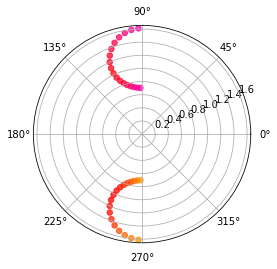

In [17]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles_bp), np.abs(poles_bp), c=np.angle(poles_bp), s=30, cmap='hsv', alpha=0.75)
plt.savefig('Poles_s.pdf')


In [18]:
z = symbols('z') # Symbol for Z-domain
bilenear_trans = (z-1)/(z+1) # to transform s to z

bilenear_trans

(z - 1)/(z + 1)

In [19]:
tr_fn_z = Tr_fn_bp.subs(s,bilenear_trans) # Substitute s by bilinear transform
tr_fn_z

1.70948084487145*(z - 1)**18/((z + 1)**18*(1.13189575545203*(z - 1)**2/(z + 1)**2 + (0.0897910211242331 - 1.02631606776833*I)*(z - 1)/(z + 1) + 1.28231780692106)*(1.13189575545203*(z - 1)**2/(z + 1)**2 + (0.0897910211242331 + 1.02631606776833*I)*(z - 1)/(z + 1) + 1.28231780692106)*(1.13189575545203*(z - 1)**2/(z + 1)**2 + (0.266644808632288 - 0.99513197339018*I)*(z - 1)/(z + 1) + 1.28231780692106)*(1.13189575545203*(z - 1)**2/(z + 1)**2 + (0.266644808632289 + 0.99513197339018*I)*(z - 1)/(z + 1) + 1.28231780692106)*(1.13189575545203*(z - 1)**2/(z + 1)**2 + (0.435396728558835 + 0.933711297561643*I)*(z - 1)/(z + 1) + 1.28231780692106)*(1.13189575545203*(z - 1)**2/(z + 1)**2 + (0.435396728558835 - 0.933711297561643*I)*(z - 1)/(z + 1) + 1.28231780692106)*(1.13189575545203*(z - 1)**2/(z + 1)**2 + (0.590919339209496 - 0.843920276437411*I)*(z - 1)/(z + 1) + 1.28231780692106)*(1.13189575545203*(z - 1)**2/(z + 1)**2 + (0.590919339209497 + 0.84392027643741*I)*(z - 1)/(z + 1) + 1.28231780692106)*(

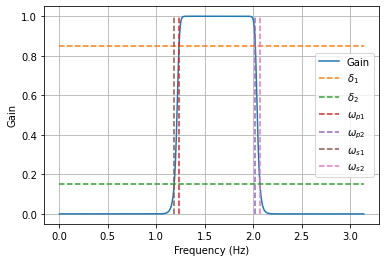

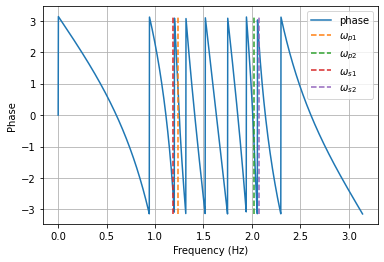

In [25]:

butter_z = lambdify(z, tr_fn_z,'numpy') # returns a numpy-ready function

ang_freq = np.linspace(0,np.pi,1401)

z_response = butter_z(np.exp(ang_freq*(1j)))
z_mag_resp = np.absolute(z_response)
z_phase = np.angle(z_response)

plt.plot(ang_freq,z_mag_resp,label="Gain")
plt.plot([ang_freq[0],ang_freq[-1]], [1-delta1,1-delta1],'--', label='$\delta_1$')
plt.plot([ang_freq[0],ang_freq[-1]], [delta2,delta2],'--', label='$\delta_2$')
plt.plot([wp1,wp1], [0,1],'--', label='$\omega_{p1}$')
plt.plot([wp2,wp2], [0,1],'--', label='$\omega_{p2}$')
plt.plot([ws1,ws1], [0,1],'--', label='$\omega_{s1}$')
plt.plot([ws2,ws2], [0,1],'--', label='$\omega_{s2}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Gain')
plt.grid(True)
plt.legend(loc='best')

plt.savefig('Gain_z.pdf')

plt.show()

plt.plot(ang_freq,z_phase,label="phase")
plt.plot([wp1,wp1], [-pi,pi],'--', label='$\omega_{p1}$')
plt.plot([wp2,wp2], [-pi,pi],'--', label='$\omega_{p2}$')
plt.plot([ws1,ws1], [-pi,pi],'--', label='$\omega_{s1}$')
plt.plot([ws2,ws2], [-pi,pi],'--', label='$\omega_{s2}$')

plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase')
plt.grid(True)
plt.legend(loc='best')
plt.savefig('Phase_z.pdf')
plt.show()


In [26]:
poles_Z = solve(1/tr_fn_z) # Solve for poles of the system
poles_Z = np.fromiter(poles_Z,dtype=complex)
Zeros_Z = solve(tr_fn_z) # Solve for Zeros of the system
Zeros_Z = np.fromiter(Zeros_Z,dtype=complex)

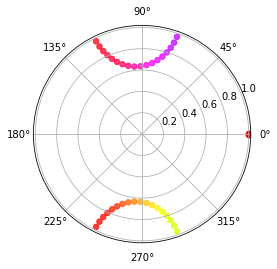

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(projection='polar')
c = ax.scatter(np.angle(poles_Z), np.abs(poles_Z), c=np.angle(poles_Z), s=30, cmap='hsv', alpha=0.75)
c = ax.scatter(np.angle(Zeros_Z), np.abs(Zeros_Z), c=np.angle(Zeros_Z), s=50, cmap='hsv', alpha=1)
plt.savefig('Poles_Zeros_Z.pdf')

In [ ]:
print(latex(round_expr(simplify(tr_fn_z).subs(I,0),3)))

\frac{1.709 z^{36} - 30.771 z^{34} + 261.551 z^{32} - 1394.936 z^{30} + 5231.011 z^{28} - 14646.832 z^{26} + 31734.802 z^{24} - 54402.518 z^{22} + 74803.463 z^{20} - 83114.959 z^{18} + 74803.463 z^{16} - 54402.518 z^{14} + 31734.802 z^{12} - 14646.832 z^{10} + 5231.011 z^{8} - 1394.936 z^{6} + 261.551 z^{4} - 30.771 z^{2} + 1.709}{945315407.72 z^{36} + 1575496528.934 z^{35} + 9515495621.333 z^{34} + 13802684593.638 z^{33} + 45633293042.764 z^{32} + 58565013297.698 z^{31} + 138602568616.246 z^{30} + 159069621866.576 z^{29} + 298706616300.439 z^{28} + 308695423232.066 z^{27} + 484775857155.089 z^{26} + 453027906466.629 z^{25} + 613532288719.19 z^{24} + 519520381572.551 z^{23} + 618615505907.508 z^{22} + 474690288105.578 z^{21} + 503294140171.428 z^{20} + 349344511486.478 z^{19} + 332547903529.3 z^{18} + 207993252980.085 z^{17} + 178689408305.498 z^{16} + 100069840006.996 z^{15} + 77810836309.186 z^{14} + 38645453057.641 z^{13} + 27221204806.462 z^{12} + 11821701758.361 z^{11} + 753643825

In [ ]:
print(latex(round_expr(factor(tr_fn_z),3)))

\frac{1.709 \left(z - 1\right)^{18} \left(z + 1\right)^{18}}{\left(z^{2} \cdot \left(2.504 - 1.026 i\right) + 0.301 z + 2.324 + 1.026 i\right) \left(z^{2} \cdot \left(2.504 + 1.026 i\right) + 0.301 z + 2.324 - 1.026 i\right) \left(z^{2} \cdot \left(2.681 - 0.995 i\right) + 0.301 z + 2.148 + 0.995 i\right) \left(z^{2} \cdot \left(2.681 + 0.995 i\right) + 0.301 z + 2.148 - 0.995 i\right) \left(z^{2} \cdot \left(2.85 - 0.934 i\right) + 0.301 z + 1.979 + 0.934 i\right) \left(z^{2} \cdot \left(2.85 + 0.934 i\right) + 0.301 z + 1.979 - 0.934 i\right) \left(z^{2} \cdot \left(3.005 - 0.844 i\right) + 0.301 z + 1.823 + 0.844 i\right) \left(z^{2} \cdot \left(3.005 + 0.844 i\right) + 0.301 z + 1.823 - 0.844 i\right) \left(z^{2} \cdot \left(3.143 - 0.728 i\right) + 0.301 z + 1.686 + 0.728 i\right) \left(z^{2} \cdot \left(3.143 + 0.728 i\right) + 0.301 z + 1.686 - 0.728 i\right) \left(z^{2} \cdot \left(3.258 - 0.591 i\right) + 0.301 z + 1.57 + 0.591 i\right) \left(z^{2} \cdot \left(3.258 + 0.591 i\